# Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.


Linear Regression

Purpose: Linear regression is used to predict a continuous dependent variable based on one or more independent variables. It estimates the relationship between the dependent variable and the independent variables by fitting a linear equation to the observed data.

Logistic Regression

Purpose: Logistic regression is used when the dependent variable is categorical, especially when it involves binary outcomes (i.e., two classes). It estimates the probability of the dependent variable falling into one of the categories.

Scenario: Predicting Customer Churn

Context: A telecommunications company wants to predict whether a customer will churn (i.e., cancel their subscription) in the next 6 months based on various features.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Example data (replace with your actual data)
data = {
    'Age': [25, 40, 35, 50, 29, 60, 22, 45],
    'Contract Type': [1, 2, 1, 2, 1, 2, 1, 2],  # 1 = Monthly, 2 = Yearly
    'Monthly Charges': [70, 100, 80, 90, 60, 120, 65, 110],
    'Tenure': [12, 24, 18, 30, 15, 36, 10, 27],
    'Churn': [0, 1, 0, 1, 0, 1, 0, 1]  # 0 = No churn, 1 = Churn
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['Age', 'Contract Type', 'Monthly Charges', 'Tenure']]
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# Q2. What is the cost function used in logistic regression, and how is it optimized?


Cost Function in Logistic Regression

The cost function for logistic regression is known as the logistic loss function or binary cross-entropy loss. It quantifies the difference between the predicted probabilities and the actual binary labels.

Optimization of the Cost Function

To find the optimal model parameters 

θ, the cost function is minimized. This is typically done using optimization algorithms. The most common method for this is Gradient Descent.

Gradient Descent

Gradient descent is an iterative optimization algorithm used to minimize the cost function. Here’s a high-level overview of how it works:

Initialize Parameters: Start with initial values for the parameters 

θ (often zeros or small random values).

Compute Gradients: Calculate the gradient of the cost function with respect to each parameter. This gradient indicates the direction and rate of change of the cost function

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Convert to a binary classification problem: Is the species Setosa (1) or not (0)
y = (y == 0).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# To illustrate the cost function and gradient descent, we use scikit-learn's implementation
# Since scikit-learn doesn't provide direct access to the cost function, we can calculate it manually

def logistic_cost_function(X, y, theta):
    m = len(y)
    h = 1 / (1 + np.exp(-np.dot(X, theta)))
    epsilon = 1e-10  # To avoid log(0) issues
    cost = (-1 / m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost

# Add an intercept term to X
X_train_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_with_intercept = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Get the fitted parameters
theta = np.hstack([model.intercept_, model.coef_.flatten()])

# Calculate the cost on the training set
cost = logistic_cost_function(X_train_with_intercept, y_train, theta)
print(f"Training Cost: {cost:.2f}")


Accuracy: 1.00
Confusion Matrix:
[[26  0]
 [ 0 19]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Training Cost: 0.02


# Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.


Regularization in logistic regression is a technique used to prevent overfitting by adding a penalty term to the cost function. Overfitting occurs when a model learns not only the underlying patterns but also the noise in the training data, leading to poor generalization on new, unseen data.

Concept of Regularization


In logistic regression, regularization modifies the cost function to include a penalty for large coefficients. This helps to control the complexity of the model, making it simple

How Regularization Helps Prevent Overfitting

Penalizes Large Coefficients:

By adding a penalty term, regularization discourages the model from assigning too much importance to any single feature. This prevents the model from fitting noise in the training data.

Promotes Simpler Models: 

Regularization tends to produce models with smaller coefficients. Simpler models are less likely to overfit the training data and more likely to generalize well to new data.

Feature Selection (L1 Regularization):

L1 regularization can drive some coefficients to zero, effectively removing less important features. This leads to a more interpretable model and can improve performance by focusing on the most relevant features.

Coefficient Shrinkage (L2 Regularization):

L2 regularization reduces the magnitude of all coefficients, which helps in handling multicollinearity (when features are highly correlated) and improves model stability.

# Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?


The ROC curve (Receiver Operating Characteristic curve) is a graphical representation used to evaluate the performance of a binary classification model, such as logistic regression.

How the ROC Curve Works:
    
The ROC curve plots TPR (y-axis) against FPR (x-axis) at various threshold settings.
Each point on the curve represents a different threshold used to classify observations as positive or negative.
The curve typically starts at (0, 0) and ends at (1, 1).


Interpreting the ROC Curve:
    
AUC (Area Under the Curve): The area under the ROC curve is a single scalar value summarizing the performance of the model. It ranges from 0 to 1.
AUC = 0.5: The model performs no better than random chance.
AUC = 1.0: The model has perfect classification.
0.5 < AUC < 1.0: The closer the AUC is to 1, the better the model's performance.


Using ROC Curve to Evaluate Logistic Regression:
    
By plotting the ROC curve, you can visualize how well your logistic regression model distinguishes between the two classes (e.g., churn vs. no churn).
The ROC curve helps in choosing an optimal threshold for classification, depending on the desired trade-off between TPR and FPR.
The AUC score can be used to compare different models or model configurations, with a higher AUC indicating better performance.

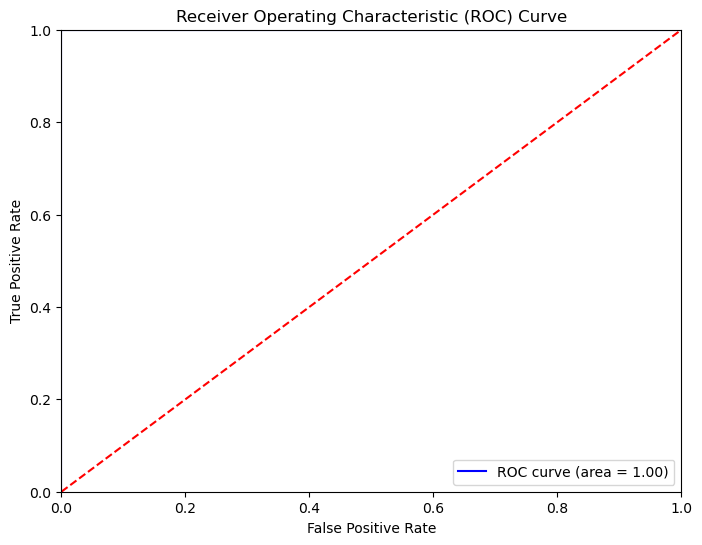

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load a dataset (e.g., Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Since Iris dataset has 3 classes, we'll binarize it for binary classification (e.g., class 0 vs others)
y = label_binarize(y, classes=[0, 1, 2])
y = y[:, 0]  # We'll use class 0 as the positive class

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?


Feature selection is an important step in the modeling process, especially in logistic regression, to enhance the model's performance by improving accuracy, reducing overfitting, and making the model more interpretable. Here are some common techniques for feature selection in logistic regression:

1. Univariate Feature Selection

Technique: Statistical tests like Chi-Square, ANOVA, or mutual information are used to select the most relevant features based on their individual relationship with the target variable.
How It Helps: By selecting features with the highest scores, the model focuses on the most relevant features, which can improve performance and reduce noise.

2. Recursive Feature Elimination (RFE)

Technique: RFE recursively removes the least important features, as determined by the model's coefficients, until the desired number of features is reached.
How It Helps: By iteratively eliminating the weakest features, RFE ensures that only the most important features are retained, potentially improving model accuracy and interpretability.

3. Regularization (L1 and L2 Penalties)

Technique: Regularization adds a penalty to the loss function to shrink the coefficients of less important features. L1 regularization (Lasso) can shrink some coefficients to zero, effectively performing feature selection, while L2 regularization (Ridge) shrinks coefficients but does not set them to zero.
How It Helps: Regularization helps prevent overfitting by penalizing large coefficients and can reduce the complexity of the model by selecting only the most important features (especially with L1 regularization).

4. Feature Importance from Tree-Based Models

Technique: Train a tree-based model like Random Forest or Gradient Boosting to calculate feature importance scores, and then select the top features based on these scores for the logistic regression model.
How It Helps: Tree-based models are good at capturing non-linear relationships and interactions, and the most important features identified can be useful for the logistic regression model, which is linear.

5. Principal Component Analysis (PCA)

Technique: PCA transforms the original features into a smaller set of uncorrelated components that capture the most variance in the data.
How It Helps: By reducing dimensionality and removing multicollinearity, PCA can help improve model performance and reduce overfitting. However, it may make the model less interpretable.

6. Correlation Matrix with Heatmap

Technique: Calculate the correlation matrix of the features and use a heatmap to visually identify and remove highly correlated (redundant) features.
How It Helps: Removing highly correlated features helps reduce multicollinearity, which can improve the stability and interpretability of the logistic regression model.

7. Variance Thresholding

Technique: Remove features with low variance across the dataset, as they likely contain little information.
How It Helps: This helps to eliminate features that do not contribute much to the prediction, making the model more efficient and potentially improving generalization.

How These Techniques Improve Model Performance:
    
Reduce Overfitting: By eliminating irrelevant or redundant features, the model is less likely to overfit the training data.
Improve Accuracy: Focusing on the most relevant features often leads to better generalization on unseen data.
Enhance Interpretability: With fewer features, it’s easier to understand and explain the model.
Increase Efficiency: Fewer features reduce the computational cost and speed up training and prediction.

# Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?


Resampling: Balances the dataset by either oversampling the minority or undersampling the majority class.

Class Weighting: Adjusts the logistic regression model to give more importance to the minority class.

Evaluation Metrics: Use metrics better suited to imbalanced datasets, like precision-recall curves, F1 scores, and ROC-AUC.

Ensemble Methods: Can natively handle class imbalance or can be adjusted to do so.

Data Augmentation and Threshold Moving: Enhance the representation of the minority class or adjust model sensitivity.\


In [9]:
pip install imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Original class distribution: [901  99]
Class distribution after SMOTE: [632 632]
Confusion Matrix:
 [[267   2]
 [  3  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       269
           1       0.93      0.90      0.92        31

    accuracy                           0.98       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.98      0.98      0.98       300


ROC-AUC Score: 0.98


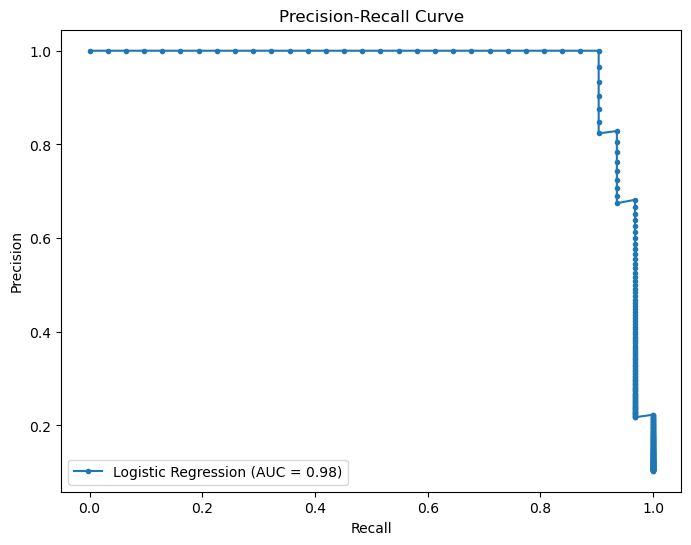

F1 Score: 0.92


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Load a sample imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, 
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

# Print the original class distribution
print("Original class distribution:", np.bincount(y))

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the new class distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

# Step 4: Initialize and fit the logistic regression model with class weight adjustment
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# Step 6: Evaluate the model using appropriate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Calculate and plot the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


# Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity
# among the independent variables?

Multicollinearity

Issue: High correlation between independent variables can make coefficient estimates unstable and inflated.
Solutions:
Remove Correlated Features: Identify and remove highly correlated variables.
Regularization: Use Ridge (L2) regression to stabilize coefficients.
Combine Features: Use PCA to combine correlated features.
Class Imbalance

Issue: Imbalanced class distribution can bias the model towards the majority class, affecting performance on the minority class.
Solutions:
Resampling: Use SMOTE to oversample the minority class or undersample the majority class.
Adjust Class Weights: Modify the class weights in the model to give more importance to the minority class.
Use Appropriate Metrics: Evaluate using metrics like Precision-Recall AUC, F1 Score, and ROC-AUC instead of accuracy.
Feature Scaling

Issue: Logistic regression is sensitive to the scale of features, leading to biased coefficient estimates and convergence issues.
Solutions:
Standardize Features: Use StandardScaler to normalize feature scales.
Overfitting

Issue: The model may learn the noise in the training data rather than the underlying pattern.
Solutions:
Regularization: Apply L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting.
Cross-Validation: Use cross-validation to evaluate the model’s performance and avoid overfitting.
Model Assumptions

Issue: Logistic regression assumes a linear relationship between predictors and the log-odds of the response.
Solutions:
Transform Features: Apply transformations or create interaction terms to capture non-linear relationships.
Feature Engineering: Develop new features to better represent the relationships in the data.
Addressing these challenges can enhance the effectiveness, accuracy, and robustness of your logistic regression model.

Original class distribution: [901  99]
Class distribution after SMOTE: [629 629]
VIF Data:
    feature       VIF
0        0       inf
1        1       inf
2        2  1.019241
3        3       inf
4        4       inf
5        5  1.037148
6        6  1.022505
7        7       inf
8        8       inf
9        9       inf


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Confusion Matrix:
 [[271   1]
 [  1  27]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.96      0.96      0.96        28

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300


ROC-AUC Score: 1.00


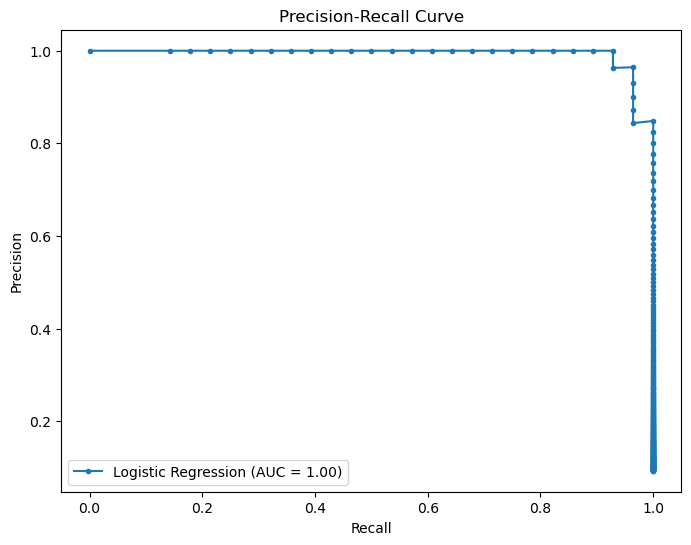

F1 Score: 0.96

Feature Importances:
 [ 0.21333333  0.01266667  0.00333333  0.00533333  0.02733333 -0.00133333
  0.00266667  0.06733333  0.          0.18066667]


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Step 1: Generate a sample imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
                           n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

# Print the original class distribution
print("Original class distribution:", np.bincount(y))

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the new class distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 5: Handle Multicollinearity
# Compute VIF (Variance Inflation Factor)
def compute_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = range(X.shape[1])
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_data = compute_vif(X_train_scaled)
print("VIF Data:\n", vif_data)

# If VIF is high, we could consider removing variables or applying Ridge regression
# Here, we use Ridge regression as an example
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_resampled)

# Step 6: Initialize and fit the Logistic Regression model with cross-validation
logistic_model = LogisticRegressionCV(cv=5, penalty='l2', max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_scaled, y_train_resampled)

# Step 7: Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)
y_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Step 8: Evaluate the model using appropriate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Calculate and plot the Precision-Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Feature Importance using permutation importance
results = permutation_importance(logistic_model, X_test_scaled, y_test, scoring='accuracy')
importance = results.importances_mean
print("\nFeature Importances:\n", importance)
